# SMM with Gradient Descent

## Python Imports

In [1]:
import numpy as np
import random
import copy
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

%matplotlib inline

## Data Imports

## DEFINE THE PATH TO YOUR COURSE DIRECTORY

In [2]:
data_dir = "/Users/mblanco/Desktop/DTU/AlgorithmsInBioinf/data/"

### Training Data

In [3]:
training_file = data_dir + "SMM/A0201_training"
#training_file = data_dir + "SMM/A2403_training"

training = np.loadtxt(training_file, dtype=str)

### Evaluation Data

In [4]:
evaluation_file = data_dir + "SMM/A0201_evaluation"
#evaluation_file = data_dir + "SMM/A2403_evaluation"
evaluation = np.loadtxt(evaluation_file, dtype=str)

### Alphabet

In [5]:
alphabet_file = data_dir + "Matrices/alphabet"
alphabet = np.loadtxt(alphabet_file, dtype=str)

### Sparse Encoding Scheme

In [6]:
sparse_file = data_dir + "Matrices/sparse"
_sparse = np.loadtxt(sparse_file, dtype=float)
sparse = {}

for i, letter_1 in enumerate(alphabet):
    
    sparse[letter_1] = {}

    for j, letter_2 in enumerate(alphabet):
        
        sparse[letter_1][letter_2] = _sparse[i, j]

## Peptide Encoding

In [7]:
def encode(peptides, encoding_scheme, alphabet):
    
    encoded_peptides = []

    for peptide in peptides:

        encoded_peptide = []

        for peptide_letter in peptide:

            for alphabet_letter in alphabet:

                encoded_peptide.append(encoding_scheme[peptide_letter][alphabet_letter])

        encoded_peptides.append(encoded_peptide)
        
    return np.array(encoded_peptides)

## Error Function

In [8]:
def cumulative_error(peptides, y, lamb, weights):

    error = 0
    
    for i in range(0, len(peptides)):
        
        # get peptide
        peptide = peptides[i]

        # get target prediction value
        y_target = y[i]
        
        # get prediction
        y_pred = np.dot(peptide, weights)
            
        # calculate error
        error += 1.0/2 * (y_pred - y_target)**2
        
    gerror = error + lamb*np.dot(weights, weights)
    error /= len(peptides)
        
    return gerror, error

## Predict value for a peptide list

In [9]:
def predict(peptides, weights):

    pred = []
    
    for i in range(0, len(peptides)):
        
        # get peptide
        peptide = peptides[i]
        
        # get prediction
        y_pred = np.dot(peptide, weights)
        
        pred.append(y_pred)
        
    return pred

## Calculate MSE between two vectors

In [10]:
def cal_mse(vec1, vec2):
    
    mse = 0
    
    for i in range(0, len(vec1)):
        mse += (vec1[i] - vec2[i])**2
        
    mse /= len(vec1)
    
    return( mse)

## Gradient Descent

In [31]:
def gradient_descent(y_pred, y_target, peptide, weights, lamb_N, epsilon):
    
    # do is dE/dO
    do = y_pred - y_target
        
    for i in range(0, len(weights)):
        
        de_dw_i = do * peptide[i] + 2*lamb_N * weights[i]

        weights[i] -= epsilon * de_dw_i

## Main Loop



In [39]:
# Random seed 
np.random.seed( 1 )

# peptides
peptides = training[:, 0]
peptides = encode(peptides, sparse, alphabet)
N = len(peptides)

# target values
y = np.array(training[:, 1], dtype=float)

#evaluation peptides
evaluation_peptides = evaluation[:, 0]
evaluation_peptides = encode(evaluation_peptides, sparse, alphabet)

#evaluation targets
evaluation_targets = np.array(evaluation[:, 1], dtype=float)

# weights
input_dim  = len(peptides[0])
output_dim = 1
w_bound = 0.1
weights = np.random.uniform(-w_bound, w_bound, size=input_dim)

# training epochs
epochs = 100

# regularization lambda
#lamb = 1
lamb = 10
#lamb = 0.01

# regularization lambda per target value
lamb_N = lamb/N

# learning rate
epsilon = 0.01

# error  plot
gerror_plot = []
mse_plot = []
train_mse_plot = []
eval_mse_plot = []
train_pcc_plot = []
eval_pcc_plot = []

# for each training epoch
for e in range(0, epochs):

    # for each peptide
    for i in range(0, N):

        # random index
        ix = np.random.randint(0, N)
        
        # get peptide       
        peptide = peptides[ix]

        # get target prediction value
        y_target = y[ix]
       
        # get initial prediction
        y_pred = np.dot(peptide, weights)

        # gradient descent 
        gradient_descent(y_pred, y_target, peptide, weights, lamb_N, epsilon)

    # compute error
    gerr, mse = cumulative_error(peptides, y, lamb, weights) 
    gerror_plot.append(gerr)
    mse_plot.append(mse)
    
    # predict on training data
    train_pred = predict( peptides, weights )
    train_mse = cal_mse( y, train_pred )
    train_mse_plot.append(train_mse)
    train_pcc = pearsonr( y, train_pred )
    train_pcc_plot.append( train_pcc[0] )
        
    # predict on evaluation data
    eval_pred = predict(evaluation_peptides, weights )
    eval_mse = cal_mse(evaluation_targets, eval_pred )
    eval_mse_plot.append(eval_mse)
    eval_pcc = pearsonr(evaluation_targets, eval_pred)
    eval_pcc_plot.append( eval_pcc[0] )
    
    print ("Epoch: ", e, "Gerr:", gerr, train_pcc[0], train_mse, eval_pcc[0], eval_mse)

Epoch:  0 Gerr: 49.52857497707184 0.7924065914380283 0.03527460061743491 0.7608992365521491 0.039414910462562146
Epoch:  1 Gerr: 45.60944774275309 0.8166740704330173 0.03162591759091771 0.7805549067006647 0.03657473559317748
Epoch:  2 Gerr: 45.25992426811406 0.8180433228092748 0.03112394560179985 0.7894227799434302 0.03528144113702155
Epoch:  3 Gerr: 44.52465515821702 0.8209741996459821 0.03095261566720379 0.7898643827474796 0.03526016781988521
Epoch:  4 Gerr: 44.56288535067507 0.8229323019122375 0.030805821149249808 0.7905403976442589 0.035668445523316765
Epoch:  5 Gerr: 44.98285207660752 0.8203620725034848 0.030766059176551584 0.7789987968402565 0.03688664478809839
Epoch:  6 Gerr: 44.82820284226088 0.8206512870399694 0.031028205375875664 0.7923432848552399 0.03492435742979991
Epoch:  7 Gerr: 44.30085779538461 0.8223432550924075 0.030556560640456948 0.7886899800261655 0.035407838371211434
Epoch:  8 Gerr: 44.46199704991906 0.8216265757629994 0.030899654527254898 0.7861994214819781 0.03

## Error Plot

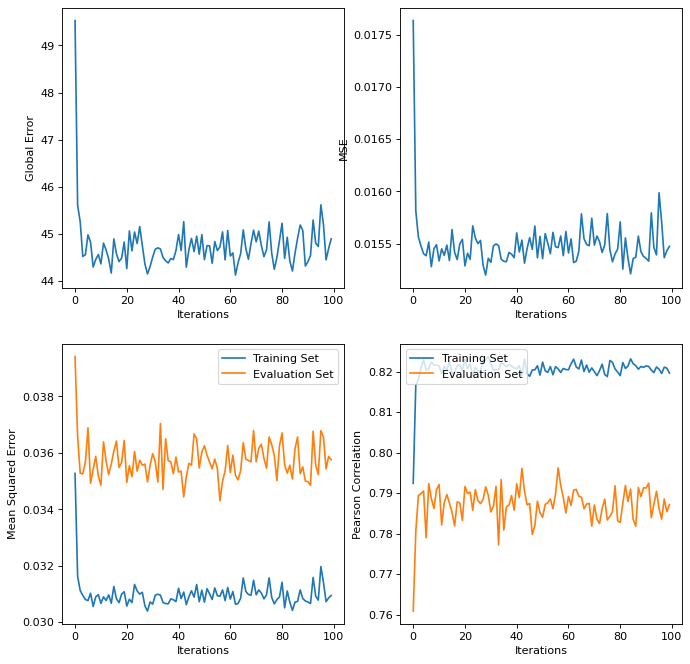

In [40]:
fig = plt.figure(figsize=(10, 10), dpi= 80)

x = np.arange(0, len(gerror_plot))

plt.subplot(2, 2, 1)
plt.plot(x, gerror_plot)
plt.ylabel("Global Error", fontsize=10);
plt.xlabel("Iterations", fontsize=10);

plt.subplot(2, 2, 2)
plt.plot(x, mse_plot)
plt.ylabel("MSE", fontsize=10);
plt.xlabel("Iterations", fontsize=10);


x = np.arange(0, len(train_mse_plot))

plt.subplot(2, 2, 3)
plt.plot(x, train_mse_plot, label="Training Set")
plt.plot(x, eval_mse_plot, label="Evaluation Set")
plt.ylabel("Mean Squared Error", fontsize=10);
plt.xlabel("Iterations", fontsize=10);
plt.legend(loc='upper right');


plt.subplot(2, 2, 4)
plt.plot(x, train_pcc_plot, label="Training Set")
plt.plot(x, eval_pcc_plot, label="Evaluation Set")
plt.ylabel("Pearson Correlation", fontsize=10);
plt.xlabel("Iterations", fontsize=10);
plt.legend(loc='upper left');

## Get PSSM Matrix

### Vector to Matrix

In [34]:
# our matrices are vectors of dictionaries
def vector_to_matrix(vector, alphabet):
    
    rows = int(len(vector)/len(alphabet))
    
    matrix = [0] * rows
    
    offset = 0
    
    for i in range(0, rows):
        
        matrix[i] = {}
        
        for j in range(0, 20):
            
            matrix[i][alphabet[j]] = vector[j+offset] 
        
        offset += len(alphabet)

    return matrix

### Matrix to Psi-Blast

In [35]:
def to_psi_blast(matrix):

    # print to user
    
    header = ["", "A", "R", "N", "D", "C", "Q", "E", "G", "H", "I", "L", "K", "M", "F", "P", "S", "T", "W", "Y", "V"]

    print('{:>4} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8}'.format(*header)) 

    letter_order = ["A", "R", "N", "D", "C", "Q", "E", "G", "H", "I", "L", "K", "M", "F", "P", "S", "T", "W", "Y", "V"]

    for i, row in enumerate(matrix):

        scores = []

        scores.append(str(i+1) + " A")

        for letter in letter_order:

            score = row[letter]

            scores.append(round(score, 4))

        print('{:>4} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8}'.format(*scores)) 

### Print

In [36]:
matrix = vector_to_matrix(weights, alphabet)
to_psi_blast(matrix)

            A        R        N        D        C        Q        E        G        H        I        L        K        M        F        P        S        T        W        Y        V
 1 A   0.0139  -0.0008   -0.048  -0.2021  -0.0214  -0.0348  -0.1432  -0.0258  -0.0402   0.0067   0.0039   0.0479   0.0973    0.145  -0.1816  -0.0177  -0.0584   0.0154   0.1763   0.0185
 2 A   0.0305  -0.0088   -0.171  -0.1025  -0.1078   0.0762   -0.021  -0.0493  -0.0941   0.1266   0.2853  -0.0118   0.2812  -0.0009  -0.0634   0.0269   0.0391   0.1274    0.041   0.0687
 3 A    0.013   -0.086   0.0004   0.0083  -0.0447  -0.0112  -0.1022  -0.0546   -0.042   0.0687   0.0594  -0.1193   0.1883   0.0713  -0.0248   0.0148  -0.0448   0.0712   0.0867  -0.0345
 4 A   0.0346  -0.0432  -0.0102   0.0611   0.0484  -0.0009   0.0551   0.0315   0.0021  -0.0139  -0.0472    0.023   0.0336   0.0317   0.0166   0.0106   0.0079   0.0442   0.0305  -0.0003
 5 A  -0.0144  -0.0024  -0.0205   0.0321   0.0316  -0.0103   0.0129   0.000

## Performance Evaluation

In [37]:
evaluation_peptides = evaluation[:, 0]
evaluation_peptides = np.array(encode(evaluation_peptides, sparse, alphabet))

evaluation_targets = np.array(evaluation[:, 1], dtype=float)

y_pred = []
for i in range(0, len(evaluation_peptides)):
    y_pred.append(np.dot(evaluation_peptides[i].T, weights))

y_pred = np.array(y_pred)

PCC:  0.7849890215316243


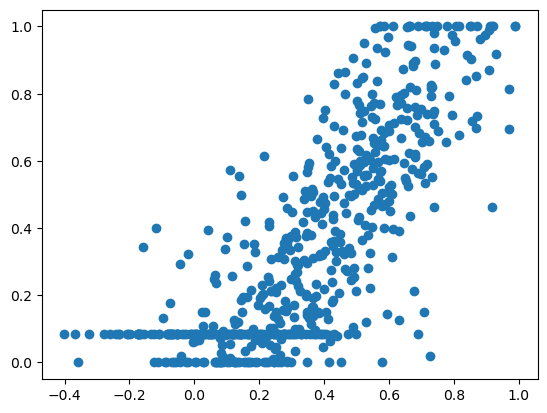

In [38]:
pcc = pearsonr(evaluation_targets, np.array(y_pred))
print("PCC: ", pcc[0])

plt.scatter(y_pred, evaluation_targets);